# Homework 4

Regression

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

### Simple regression

An important thing to remember about regression is that it is not symmetric; that is, the regression of A onto B is not the same as the regression of B onto A.

To demonstrate, I'll load data from the BRFSS.

In [2]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')

Wall time: 743 ms


In [3]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


A few people report many vegetable servings per day.  To simplify the visualization, I'm going to replace values greater than 8 with 8.

In [4]:
rows = brfss['_VEGESU1'] > 8
brfss.loc[rows, '_VEGESU1'] = 8

We can use SciPy to compute servings of vegetables as a function of income class.

In [21]:
from scipy.stats import linregress

subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

res = linregress(xs, ys)
res

LinregressResult(slope=0.070467298221375, intercept=1.5140054866876367, rvalue=0.12800264846877324, pvalue=6.064234787600395e-273, stderr=0.0019880464492623346)

Increasing income class by 1 is associated with an increase of 0.07 vegetables per day.

So if we hypothesize that people with higher incomes eat more vegetables, this result would not get us too excited.

We can see what the regression looks like by plotting the line of best fit on top of the scatter plot.

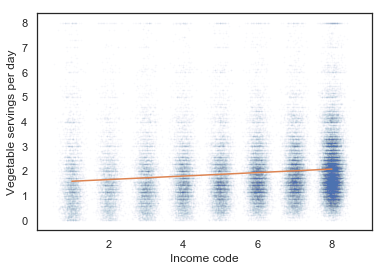

In [22]:
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', markersize=1, alpha=0.02)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')

fx1 = np.array([xs.min(), xs.max()])
fy1 = res.intercept + res.slope * fx1

plt.plot(fx1, fy1, '-', color='C1');

Now let's do it the other way around, regressing income as a function of vegetable servings.

In [23]:
xs = subset['_VEGESU1']
ys = subset['INCOME2']

res = linregress(xs, ys)
res

LinregressResult(slope=0.2325146334339002, intercept=5.399902962910681, rvalue=0.12800264846877324, pvalue=6.064234787600395e-273, stderr=0.006559778834540065)

Again, we can plot the line of best fit on top of the scatter plot.

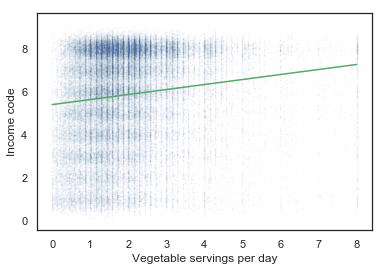

In [24]:
y_jitter = ys + np.random.normal(0, 0.3, len(xs))
plt.plot(xs, y_jitter, 'o', markersize=1, alpha=0.02)

plt.ylabel('Income code')
plt.xlabel('Vegetable servings per day')

fx2 = np.array([xs.min(), xs.max()])
fy2 = res.intercept + res.slope * fx2

plt.plot(fx2, fy2, '-', color='C2');

The slope looks more impressive now.  Each additional serving corresponds to 0.24 income codes, and each income code is several thousand dollars.  So a result that seemed unimpressive in one direction seems more intruiging in the other direction.


But the primary point here is that regression is not symmetric.  To see it more clearly, I'll plot both regression lines on top of the scatter plot.

The green line is income as a function of vegetables; the orange line is vegetables as a function of income.


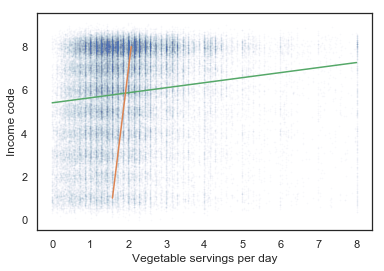

In [25]:
y_jitter = ys + np.random.normal(0, 0.3, len(xs))
plt.plot(xs, y_jitter, 'o', markersize=1, alpha=0.02)

plt.ylabel('Income code')
plt.xlabel('Vegetable servings per day')

fx2 = np.array([xs.min(), xs.max()])
fy2 = res.intercept + res.slope * fx2

plt.plot(fx2, fy2, '-', color='C2')
plt.plot(fy1, fx1, '-', color='C1');

And here's the same thing the other way around.

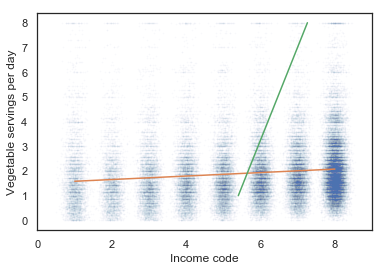

In [26]:
xs = subset['INCOME2']
ys = subset['_VEGESU1']

res = linregress(xs, ys)
res

x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', markersize=1, alpha=0.02)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')

fx1 = np.array([xs.min(), xs.max()])
fy1 = res.intercept + res.slope * fx1

plt.plot(fx1, fy1, '-', color='C1')
plt.plot(fy2, fx1, '-', color='C2');

### StatsModels

So far we have used `scipy.linregress` to run simple regression.  Sadly, that function doesn't do multiple regression, so we have to switch to a new library, StatsModels.

Here's the same example from the previous section, using StatsModels.

In [27]:
import statsmodels.formula.api as smf

model = smf.ols('INCOME2 ~ _VEGESU1', data=brfss)
model

The result is an `OLS` object, which we have to `fit`:

In [28]:
results = model.fit()
results

`results` contains a lot of information about the regression, which we can view using `summary`.

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INCOME2   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1256.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):          6.06e-273
Time:                        15:17:32   Log-Likelihood:            -1.6621e+05
No. Observations:               75426   AIC:                         3.324e+05
Df Residuals:                   75424   BIC:                         3.324e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3999      0.015    361.346      0.000       5.371       5.429
_VEGESU1       0.2325      0.007     35.445      0.000       0.220       0.245
==============================================================================
Omnibus:                     7792.716   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8127.444
Skew:                          -0.752   Prob(JB):                         0.00
Kurtosis:                       2.430   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

One of the parts we're interested in is `params`, which is a Pandas Series containing the estimated parameters.

In [30]:
results.params

Intercept    5.399903
_VEGESU1     0.232515
dtype: float64

And `rsquared` contains the coefficient of determination, $R^2$, which is pretty small in this case.

In [31]:
results.rsquared

0.01638467801502097

We can confirm that $R^2 = \rho^2$:

In [32]:
np.sqrt(results.rsquared)

0.1280026484687757

In [33]:
columns = ['INCOME2', '_VEGESU1']
brfss[columns].corr()

,INCOME2,_VEGESU1
INCOME2,1.000000,0.128003
_VEGESU1,0.128003,1.000000


**Exercise:** Run this regression in the other direction and confirm that you get the same estimated slope we got from `linregress`.  Also confirm that $R^2$ is the same in either direction (which we know because correlation is the same in either direction).

AttributeError: 'OLSResults' object has no attribute 'intercept'

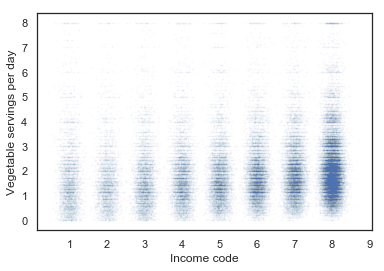

In [19]:
# Solution goes here

### Multiple regression

For experiments with multiple regression, let's load the GSS data again.

In [ ]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

In [ ]:
gss.head()

In [ ]:
gss.describe()

Let's explore the relationship between income and education, starting with simple regression:

In [ ]:
model = smf.ols('realinc ~ educ', data=gss)
model

In [ ]:
results = model.fit()
results.params

It looks like people with more education have higher incomes, about $3586 per additional year of education.

Now that we are using StatsModels, it is easy to add explanatory variables.  For example, we can add `age` to the model like this.

In [ ]:
model = smf.ols('realinc ~ educ + age', data=gss)
results = model.fit()
results.params

It looks like the effect of `age` is small, and adding it to the model has only a small effect on the estimated parameter for education.

But it's possible we are getting fooled by a nonlinear relationship.  To see what the age effect looks like, I'll group by age and plot the mean income in each age group.

In [ ]:
grouped = gss.groupby('age')
grouped

In [ ]:
mean_income_by_age = grouped['realinc'].mean()

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)');

Yeah, that looks like a nonlinear effect.

We can model it by adding a quadratic term to the model.

In [ ]:
gss['age2'] = gss['age']**2

In [ ]:
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.summary()

Now the coefficient associated with `age` is substantially larger.  And the coefficient of the quadratic term is negative, which is  consistent with the observation that the relationship has downward curvature.

**Exercise:** To see what the relationship between income and education looks like, group the dataset by `educ` and plot mean income at each education level.

In [ ]:
# Solution goes here

**Exercise:** Maybe the relationship with education is nonlinear, too.  Add a quadratic term for `educ` to the model and summarize the results.

In [ ]:
gss['educ2'] = gss['educ']**2

In [ ]:
model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
results = model.fit()
results.summary()

### Making predictions

The parameters of a non-linear model can be hard to interpret, but maybe we don't have to.  Sometimes it is easier to judge a model by its predictions rather than its parameters.

The results object provides a `predict` method that takes a `DataFrame` and uses the model to generate a prediction for each row.  Here's how we can create the `DataFrame`:

In [ ]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2

`age` contains equally-spaced points from 18 to 85, and `age2` contains those values squared.

Now we can set `educ` to 12 years of education and generate predictions:

In [ ]:
plt.plot(mean_income_by_age, 'o', alpha=0.5)

df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)
plt.plot(df['age'], pred12, label='High school')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend();

This plot shows the structure of the model, which is a parabola.  We also plot the data as an average in each age group.

**Exercise:**  Generate the same plot, but show predictions for three levels of education: 12, 14, and 16 years.

In [ ]:
# Solution goes here

### Adding categorical variables

In a formula string, we can use `C()` to indicate that a variable should be treated as categorical.  For example, the following model contains `sex` as a categorical variable.

In [ ]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

The estimated parameter indicates that `sex=2`, which indicates women, is associated with about \$4150 lower income, after controlling for age and education.

**Exercise**: Use `groupby` to group respondents by `educ`, then plot mean `realinc` for each education level.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

**Exercise:** Make a `DataFrame` with a range of values for `educ` and constant `age=30`.  Compute `age2` and `educ2` accordingly.

Use this `DataFrame` to generate predictions for each level of education, holding age constant.  Generate and plot separate predictions for men and women.

Also plot the data for comparison.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

### Logistic regression

Let's use logistic regression to see what factors are associated with support for gun control.  The variable we'll use is `gunlaw`, which represents the response to this question: "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?"

Here are the values.

In [ ]:
gss['gunlaw'].value_counts()

1 means yes, 2 means no, 0 means the question wasn't asked; 8 and 9 mean the respondent doesn't know or refused to answer.

First I'll replace 0, 8, and 9 with NaN

In [ ]:
gss['gunlaw'].replace([0, 8, 9], np.nan, inplace=True)

In order to put `gunlaw` on the left side of a regression, we have to recode it so 0 means no and 1 means yes. 

In [ ]:
gss['gunlaw'].replace(2, 0, inplace=True)

Here's what it looks like after recoding.

In [ ]:
gss['gunlaw'].value_counts()

Now we can run a logistic regression model

In [ ]:
results = smf.logit('gunlaw ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()

Here are the results.

In [ ]:
results.summary()

Here are the parameters.  The coefficient of `sex=2` is positive, which indicates that women are more likely to support gun control, at least for this question.

In [ ]:
results.params

The other parameters are not easy to interpret, but again we can use the regression results to generate predictions, which makes it possible to visualize the model.

I'll make a `DataFrame` with a range of ages and a fixed level of education, and generate predictions for men and women.

In [ ]:
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12

df['age2'] = df['age']**2
df['educ2'] = df['educ']**2

df['sex'] = 1
pred = results.predict(df)
plt.plot(df['age'], pred, label='Male')

df['sex'] = 2
pred = results.predict(df)
plt.plot(df['age'], pred, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend();

Over the range of ages, women are more likely to support gun control than men, by about 15 percentage points.

**Exercise:** Generate a similar plot as a function of education, with constant `age=40`.

In [ ]:
# Solution goes here

**Exercise:** Use the variable `grass` to explore support for legalizing marijuana.  This variable record the response to this question: "Do you think the use of marijuana should be made legal or not?"

1. Recode `grass` for use with logistic regression.

2. Run a regression model with age, education, and sex as explanatory variables.

3. Use the model to generate predictions for a range of ages, with education held constant, and plot the predictions for men and women.  Also plot the mean level of support in each age group.

4. Use the model to generate predictions for a range of education levels, with age held constant, and plot the predictions for men and women.  Also plot the mean level of support at each education level.

Note: This last graph might not look like a parabola.  Why not?

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here